In [1]:
from EventDisplay import *
init_notebook_mode(connected=True)

In [4]:
df = pd.read_pickle(common.getBaseDir()+'data/pickles/partGun_PDGid15_x1000_E300.0To300.0_NTUP_1.pkl')
event = df.loc[5]

## 1. Show Event Display

In [3]:
ed = EventDisplay()
ed.show(df,np.arange(10,21))

/Users/zihengchen/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `/Users/zihengchen/Documents/HGCal/plots/test` didn't end with .html. Adding .html to the end of your file.



## 2. Show Rechits on Layers

(60, 80)

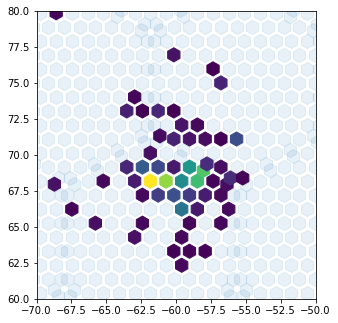

In [25]:
cl = pd.read_pickle(common.getBaseDir()+'data/geom/trigger_layer20.plk')
cl1 = cl.query('-80<c_x<-40 & 60<c_y<100')

slt = event.l==30

x = event.x[slt]
y = event.y[slt]
z = event.z[slt]
e = event.e[slt]

plt.figure(figsize=(5,5.3),facecolor='w')


plt.scatter(cl1.c_x,cl1.c_y,marker='h',s=200,alpha=0.1)
plt.scatter(x,y ,marker='h',s=200, alpha=1, c=e)
plt.xlim(-70,-50)
plt.ylim(60,80)

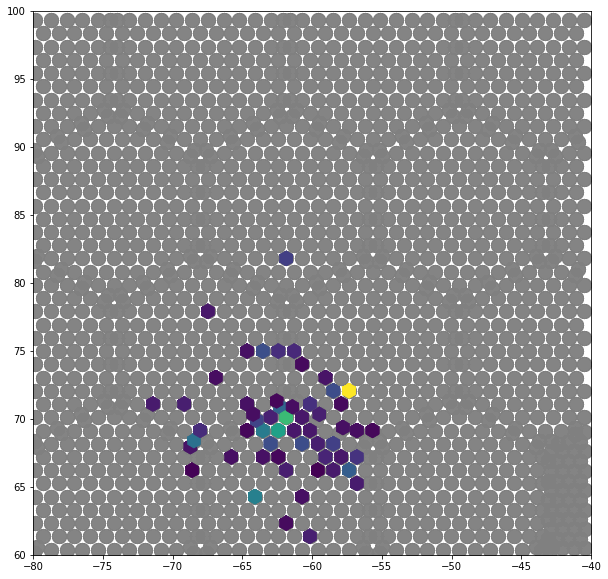

In [47]:
plt.figure(figsize=(10,10),facecolor='w')

for i in range(5):
    for j in range(5):
        index = 5*i+j+1
        layer = index+13
        
        slt = event.l==32
        
        x = event.x[slt]
        y = event.y[slt]
        z = event.z[slt]
        e = event.e[slt]
        
        
        plt.scatter(cl1.c_x, cl1.c_y, marker='o',s=200,alpha=0.1,c='gray')
        plt.scatter(x,y ,marker='h',s=200, alpha=1,c=e)
        plt.xlim(-80,-40)
        plt.ylim(60,100)
        #plt.xticks([])
        #plt.yticks([])
        #plt.axis('off')

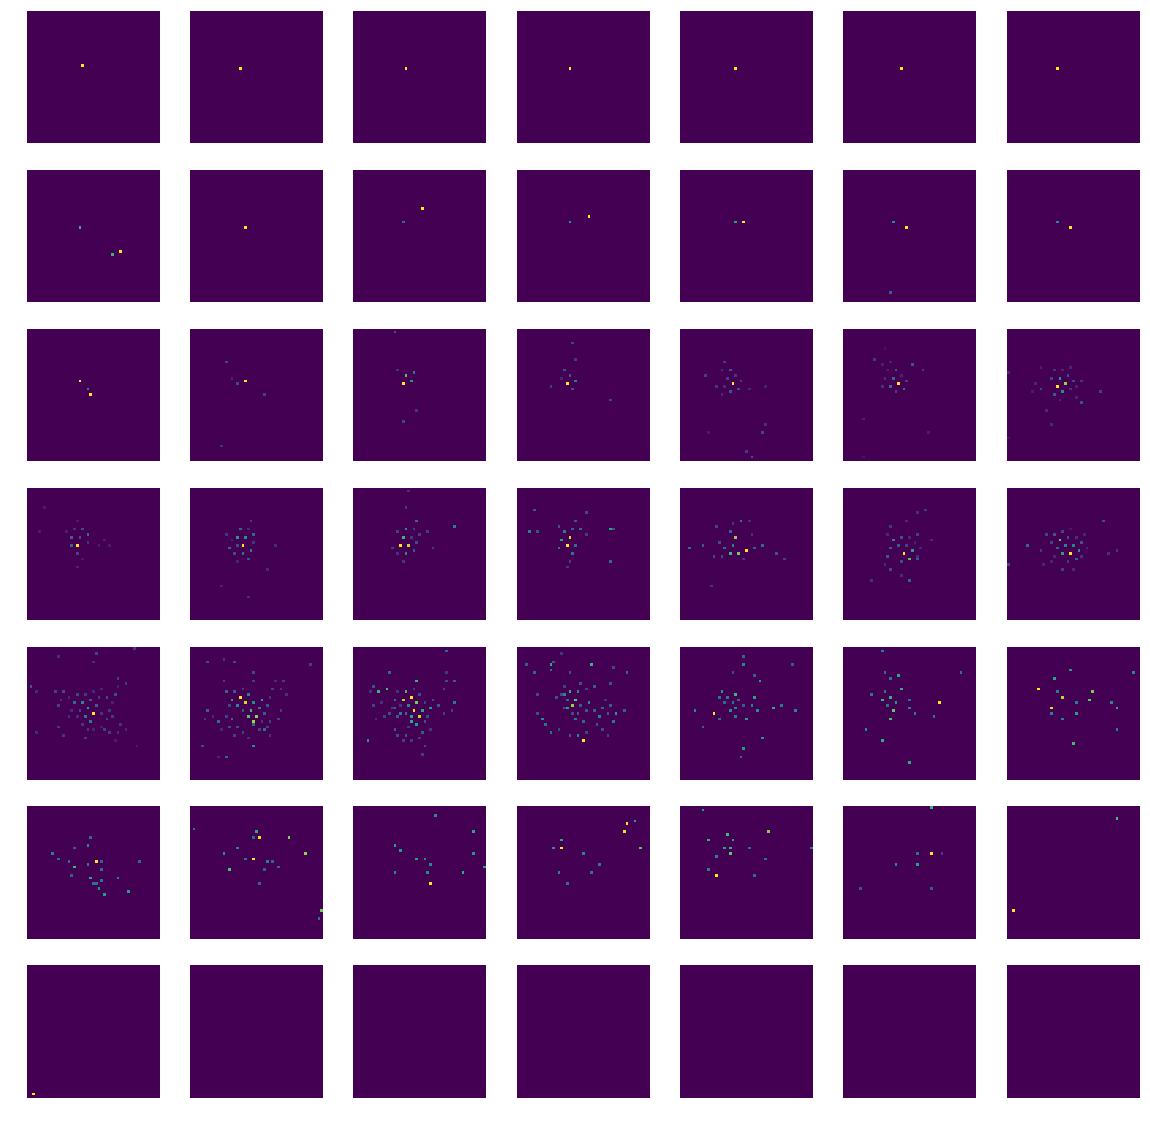

In [8]:

plt.figure(figsize=(20,20),facecolor='w')

etabin = np.linspace(2.0,2.2,50)
phibin = np.linspace(3.9,4.1,50)
for i in range(7):
    for j in range(7):
        layer = 7*i+j+1
        plt.subplot(7,7,layer)
        slt = event.l==layer
        
        x = event.x[slt]
        y = event.y[slt]
        z = event.z[slt]
        e = event.e[slt]
        
        r = (x**2+y**2)**0.5
        theta = np.arctan(r/z)
        eta = -np.log(np.tan(theta/2))
        phi = np.arccos(x/r)
        phi[x<0] = 2*np.pi - phi[x<0]
        

        h,ebin,pbin = np.histogram2d(eta,phi,weights=e,bins=(etabin,phibin))
        h = h.T
        plt.imshow(h**0.5)
        plt.axis('off')